# Classification (2)
Docs: https://scikit-learn.org/stable/modules/tree.html#classification

## Decision Trees

A decision tree is a tree-like graph with nodes representing the place where we pick an attribute and ask a question; edges represent the answers the to the question; and the leaves represent the actual output or class label. They are used in non-linear decision making with simple linear decision surface.

Decision trees classify the examples by sorting them down the tree from the root to some leaf node, with the leaf node providing the classification to the example. Each node in the tree acts as a test case for some attribute, and each edge descending from that node corresponds to one of the possible answers to the test case. This process is recursive in nature and is repeated for every subtree rooted at the new nodes.

## Practical Example

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('play.csv')
df

,Day,Weather,Temperature,Humidity,Wind,Play
0,1,Sunny,Hot,90,10,No
1,2,Cloudy,Hot,95,5,Yes
2,3,Sunny,Mild,70,30,Yes
3,4,Cloudy,Mild,89,25,Yes
4,5,Rainy,Mild,85,25,No
5,6,Rainy,Cool,60,30,No
6,7,Rainy,Mild,92,20,Yes
7,8,Sunny,Hot,95,20,No
8,9,Cloudy,Hot,65,12,Yes
9,10,Rainy,Mild,100,25,No


In [3]:
df.drop(columns = 'Day', axis = 1, inplace = True)
df

,Weather,Temperature,Humidity,Wind,Play
0,Sunny,Hot,90,10,No
1,Cloudy,Hot,95,5,Yes
2,Sunny,Mild,70,30,Yes
3,Cloudy,Mild,89,25,Yes
4,Rainy,Mild,85,25,No
5,Rainy,Cool,60,30,No
6,Rainy,Mild,92,20,Yes
7,Sunny,Hot,95,20,No
8,Cloudy,Hot,65,12,Yes
9,Rainy,Mild,100,25,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Weather      10 non-null     object
 1   Temperature  10 non-null     object
 2   Humidity     10 non-null     int64 
 3   Wind         10 non-null     int64 
 4   Play         10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [5]:
#Encode categorical data 
from sklearn.preprocessing import LabelEncoder

In [6]:
df_clean = df.copy()
lable_encoder = {}
for column in ['Weather', 'Temperature', 'Play']:
    lable_encoder[column] = LabelEncoder()
    df_clean[column] = lable_encoder[column].fit_transform(df[column])
df_clean

,Weather,Temperature,Humidity,Wind,Play
0,2,1,90,10,0
1,0,1,95,5,1
2,2,2,70,30,1
3,0,2,89,25,1
4,1,2,85,25,0
5,1,0,60,30,0
6,1,2,92,20,1
7,2,1,95,20,0
8,0,1,65,12,1
9,1,2,100,25,0


In [7]:
df

,Weather,Temperature,Humidity,Wind,Play
0,Sunny,Hot,90,10,No
1,Cloudy,Hot,95,5,Yes
2,Sunny,Mild,70,30,Yes
3,Cloudy,Mild,89,25,Yes
4,Rainy,Mild,85,25,No
5,Rainy,Cool,60,30,No
6,Rainy,Mild,92,20,Yes
7,Sunny,Hot,95,20,No
8,Cloudy,Hot,65,12,Yes
9,Rainy,Mild,100,25,No


In [8]:
lable_encoder['Weather'].inverse_transform(df_clean['Weather'])

array(['Sunny', 'Cloudy', 'Sunny', 'Cloudy', 'Rainy', 'Rainy', 'Rainy',
       'Sunny', 'Cloudy', 'Rainy'], dtype=object)

In [9]:
input_cols = df.columns.to_list()
input_cols.remove('Play')
input_cols

['Weather', 'Temperature', 'Humidity', 'Wind']

In [10]:
features = df_clean[input_cols]
response = df_clean['Play']

In [11]:
from sklearn.model_selection import train_test_split
features_train, features_test, response_train, response_test = train_test_split(features, response, test_size = 0.3, random_state = 0)

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(features_train, response_train)

DecisionTreeClassifier(random_state=0)

In [13]:
classifier.score(features_train, response_train)

1.0

In [14]:
predictions = classifier.predict(features_test)
table = pd.DataFrame({'actual':response_test, 'predict': predictions})
table

,actual,predict
2,1,1
8,1,1
4,0,1


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(response_test, predictions)

0.6666666666666666

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(response_test, predictions)


array([[0, 1],
       [0, 2]], dtype=int64)

In [17]:
pd.DataFrame(confusion_matrix(response_test, predictions))

,0,1
0,0,1
1,0,2


In [18]:
idx = ['actual 0', 'actual 1']

cm = pd.DataFrame(confusion_matrix(response_test, predictions),
                  columns = ['pred 0', 'pred 1'],
                  index= idx)
cm

,pred 0,pred 1
actual 0,0,1
actual 1,0,2


### Plotting Tree Structure

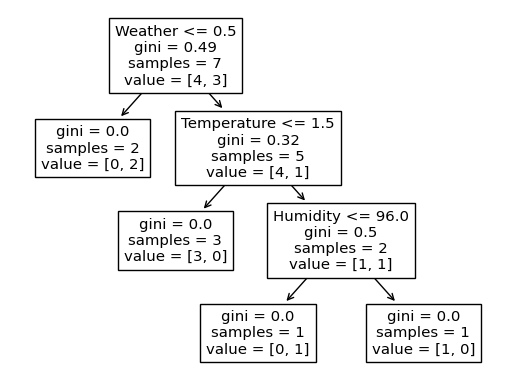

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(classifier, feature_names = input_cols)
plt.show()

In [20]:
pd.concat([features_train,response_train],axis=1)

,Weather,Temperature,Humidity,Wind,Play
9,1,2,100,25,0
1,0,1,95,5,1
6,1,2,92,20,1
7,2,1,95,20,0
3,0,2,89,25,1
0,2,1,90,10,0
5,1,0,60,30,0



A **node** in the tree represents a feature. The tree starts splitting with the node that has the highest gini impurity index value. Another metric is so-called **entropy**.

**Gini** (gini impurity index) quantifies how quality the split is. In other words, it measures how heterogeneous or mixed some value is over a set.

Decision tree algorithm in scikit learn package creates its own partititions for each node. Total number of partitions are called **samples** in each nodel. 

**Value** is the split of the samples at each node. For example, at the root node (the top node), 7 samples are divided into two child nodes of 4 and 3 samples each.

Final nodes in the tree are called **leaf** (terminal) nodes. They lead to classification or decision.

### Report Feature Importance

In [21]:
importance = pd.DataFrame({'features':input_cols, 'importance': classifier.feature_importances_})
importance

,features,importance
0,Weather,0.533333
1,Temperature,0.175000
2,Humidity,0.291667
3,Wind,0.000000


In [22]:
for i, score in enumerate(classifier.feature_importances_):
  print('%s: %.2f' % (input_cols[i], score))

Weather: 0.53
Temperature: 0.17
Humidity: 0.29
Wind: 0.00


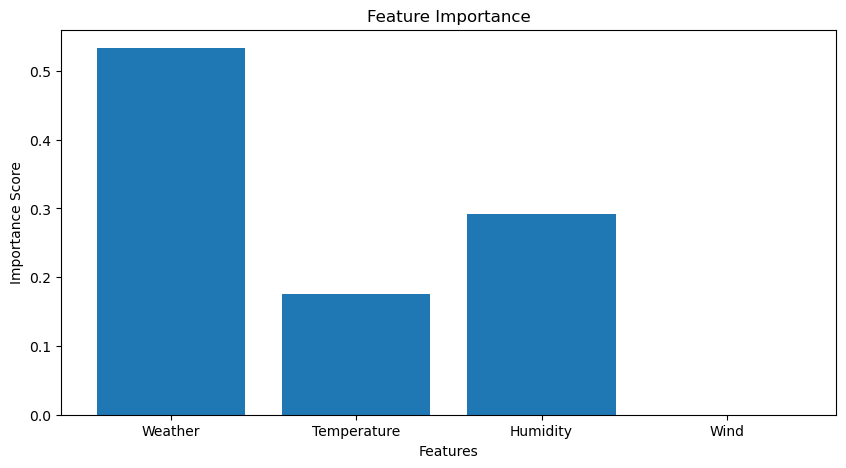

In [23]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,5))
plt.bar(x = input_cols, height = classifier.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


## Parameter Tuning with Grid Search

**Default Parameters**

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

We can create a small set of experiments to search for best parameters, which is called "Parameter Tuning". scikit learn package provides a grid search function. This creates a set of candidate parameters and the corresponding experiment is conducted by trying every candidate parameter. The grid search function returns the best candidate parameters. Experimental environment is created by using **k-fold cross validation**.

*Recall*

**Cross-validation:**Think of estimating the performance of a model for a given combination of parameters. We want to estimate the performance in a rigorous way. 

We create k folds from the data. In each fold, we fit the model and evaluate the performance over the test data within that fold. Test and train data sets are chosen in each fold according the method depicted in the image below. The value of k shouldn’t be too small or too high, ideally we choose 5 to 10 depending on the data size.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

def grid_search(X, y, kfolds):
  #create a dictionary of all values we want to test
  param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3,15)}
  #decison tree model
  dtree_model = DecisionTreeClassifier()
  #use gridsearch to test all values
  dtree_gscv = GridSearchCV(dtree_model, param_grid, cv = kfolds)
  #fit model to data
  dtree_gscv.fit(X, y)
  return dtree_gscv.best_params_

grid_search(X= features_train, y = response_train, kfolds = 3 )

{'criterion': 'gini', 'max_depth': 3}

In [25]:
classifier_cv = DecisionTreeClassifier(criterion='gini', max_depth= 3)
classifier_cv.fit(features_train, response_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
predictions_cv = classifier_cv.predict(features_test)
summary = pd.DataFrame({'actual':response_test, 'decision tree': predictions, 'decision tree cv': predictions_cv})
summary

,actual,decision tree,decision tree cv
2,1,1,1
8,1,1,1
4,0,1,1


### Example: Iris Data

In [27]:
import pandas as pd
iris = pd.read_csv('iris.csv')
iris.drop("Unnamed: 0", axis = 1, inplace=True)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
iris.shape

(150, 5)

In [30]:
iris.target.unique() #there are 3 flower species

array([0, 1, 2], dtype=int64)

Let's create the input data

In [31]:
response = iris['target']
features = iris.loc[:,'sepal length (cm)': 'petal width (cm)']

In [32]:
from sklearn.model_selection import train_test_split
features_train, features_test, response_train, response_test = train_test_split(features, response, test_size = 0.3, random_state = 0)

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(features_train, response_train)

DecisionTreeClassifier(random_state=0)

In [34]:
predictions = classifier.predict(features_test)
iris_pred = pd.DataFrame({'Actual': response_test, 'Predictions': predictions})
iris_pred.head()

,Actual,Predictions
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0


In [35]:
from sklearn.metrics import accuracy_score
print('Accuracy score on test data: ', accuracy_score(response_test, predictions))

Accuracy score on test data:  0.9777777777777777


In [36]:
from sklearn.metrics import confusion_matrix
idx = ['actual 0', 'actual 1', 'actual 2']

cm = pd.DataFrame(confusion_matrix(response_test, predictions),
                  columns = ['pred 0', 'pred 1', 'pred 2'],
                  index= idx)
cm

,pred 0,pred 1,pred 2
actual 0,16,0,0
actual 1,0,17,1
actual 2,0,0,11


In [37]:
cols = list(features.columns)
importance = pd.DataFrame({'features':cols, 'importance': classifier.feature_importances_})
importance

,features,importance
0,sepal length (cm),0.000000
1,sepal width (cm),0.021505
2,petal length (cm),0.397670
3,petal width (cm),0.580826


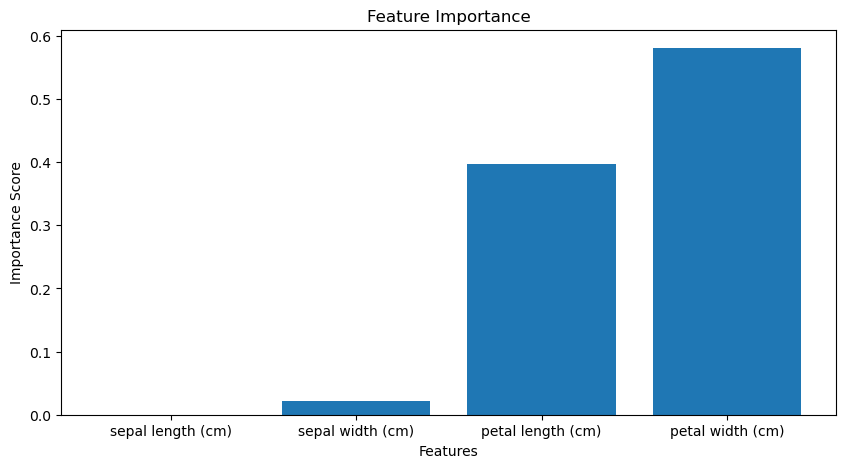

In [38]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,5))
plt.bar(x = cols, height = classifier.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

## Decision Trees for Regression

We can predict a continuous value of a response variable by applying the same tree building steps.

### Example: Boston House Prices

In [39]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

### Step 1: Create a Dataframe

In [40]:
feature_names= ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
x = pd.DataFrame(data, columns = feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [41]:
y = pd.Series(target, name='MEDV')
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

### Step 2: Identify features and response variable

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


### Step 3: Fit the model

In [43]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=2)
model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=2)

### Step 4: Test and evaluate the model

In [44]:
predictions = model.predict(X_test)
predictions[0:10]

array([20.7, 23.8, 18.5, 19.1, 20.8, 21.1, 20.3, 19. , 24.5, 16.1])

In [45]:
model.score(X_test, Y_test)

0.5625594884345205

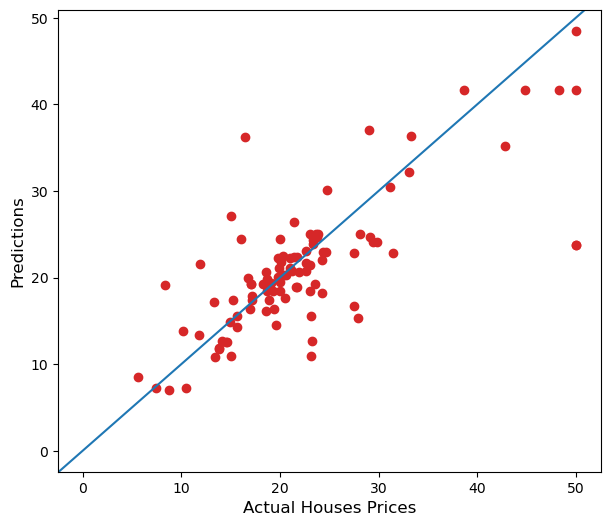

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
plt.scatter(Y_test, predictions, color = 'Tab:red')
plt.ylabel('Predictions', size = 12)
plt.xlabel('Actual Houses Prices', size = 12)
plt.axline(xy1 =[0, 0], slope=1)
plt.show()

In [47]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))
print('MAPE:', metrics.mean_absolute_percentage_error(Y_test, predictions))

Mean Absolute Error: 3.714705882352941
Mean Squared Error: 35.620098039215684
MAPE: 0.17631287978570084


### Step 6: Improve results

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

In [49]:
param_grid = {'criterion': ['squared_error', 'absolute_error'], 
                'min_samples_split': np.arange(1,5)}
  #decison tree model
dtree_model = DecisionTreeRegressor(random_state=2)
#use gridsearch to test all values
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv = 5)
#fit model to data
dtree_gscv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'min_samples_split': array([1, 2, 3, 4])})

In [50]:
dtree_gscv.best_params_

{'criterion': 'squared_error', 'min_samples_split': 4}

In [51]:
predictions_cv = dtree_gscv.predict(X_test)

In [52]:
dtree_gscv.score(X_test, Y_test)

0.6174576589343447

In [53]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions_cv))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions_cv))
print('MAPE:', metrics.mean_absolute_percentage_error(Y_test, predictions_cv))

Mean Absolute Error: 3.5218954248366017
Mean Squared Error: 31.149825708061
MAPE: 0.1552101376845229
